In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class WindWorld:
    def __init__(self, rows, columns, wind,source, destination):
        self.rows = rows
        self.columns = columns
        self.wind = wind
        self.start = source
        self.destination = destination
        
class Agent:
    def __init__(self, world, alpha, epsilon, kingsMoves=False, stochastic = False):
        self.world = world
        self.alpha = alpha
        self.epsilon = epsilon
        if(kingsMoves):
            self.num_actions = 8
        else:
            self.num_actions = 4
        self.stochastic = stochastic
        self.Q = np.zeros((world.rows, world.columns, self.num_actions)) #initializing Q values with zero

    def getNextS(self,currS, a, world):
        if(self.stochastic):
            x = np.random.randint(3)
            if(x==0):
                wind = world.wind
            elif(x==1):
                wind = [i-1 for i in world.wind]
            else:
                wind = [i+1 for i in world.wind]
            
        else:
            wind = world.wind
        i,j = currS
        if(a==0): # go up
            nextS = np.array([i-1-wind[j],j]) # decrease the row
            
        elif(a==1): # go down
            nextS = np.array([i+1-wind[j],j]) # decrease the row
                
        elif(a==2): # go right
            nextS = np.array([i-wind[j],j+1]) # increase the column and subtract the wind
            
        else: # go left
            if(a==3):
                nextS = np.array([i-wind[j],j-1]) # decrease the columns and subtract the wind
            
            else:
                if(self.num_actions==8):
                    if(a==4): # top right
                        nextS = np.array([i-1-wind[j],j+1])
                    
                    elif(a==5): # top left
                        nextS = np.array([i-1-wind[j],j-1])
                        
                    elif(a==6): # bottom right
                        nextS = np.array([i+1-wind[j],j+1])
                        
                    else: # bottom left
                        nextS = np.array([i+1-wind[j],j-1])
            
        # check whether it lies within the boundaries of the world
        if nextS[0] < 0:
            nextS[0] = 0
        if nextS[0] >= world.rows:
            nextS[0] = world.rows - 1 
            
        if nextS[1] < 0:
            nextS[1] = 0
        if nextS[1] >= world.columns:
            nextS[1] = world.columns - 1
        
        return nextS
    
    def qEstimationTD0(self, S,num_episodes):
        num_steps = []
        Q = self.Q
        
        for episode in range(num_episodes):
            steps = 0
            currS = S
            if(np.random.rand() > self.epsilon):
                currA = np.argmax(Q[currS[0],currS[1]]) # take a greedy action
            else:
                currA = np.random.randint(0,self.num_actions) # take a random action
                
            while(1):
                steps+=1
                nextS = self.getNextS(currS, currA, self.world)
                if(nextS[0]!=self.world.destination[0] or nextS[1]!=self.world.destination[1]): # rewards
                    r = -1
                else:
                    r = 0

                
                if(np.random.rand() > self.epsilon):
                    nextA = np.argmax(Q[nextS[0],nextS[1]])
                else:
                    nextA = np.random.randint(0,self.num_actions) # take a random action

                Q[currS[0],currS[1], currA] += self.alpha * (r + Q[nextS[0],nextS[1], nextA]\
                                                             - Q[currS[0],currS[1], currA])
                currS = nextS
                currA = nextA

                if r == 0:
                    break
            num_steps.append(steps)
            
        y = [i for i in range(len(num_steps))]
        return num_steps,y

In [11]:
# make number of columns equal to the number of elements in the wind
# defining the environment and the agent
np.random.seed(1)
rows = 7
columns = 10
wind = np.array([0,0,0,1,1,1,2,2,1,0]) # wind has to be subtracted according to the convention
source = np.array([3,0])
destination = np.array([3,7])
epsilon = 0.01
alpha = 0.5
num_episodes  = 170
myWorld = WindWorld(rows, columns, wind, source, destination)
kingsMoves = False
stochastic = False
myAgent = Agent(myWorld, alpha, epsilon,kingsMoves, stochastic) # number of actions should be 8 case of kings moves
time_steps, episodes = myAgent.qEstimationTD0(source,num_episodes)

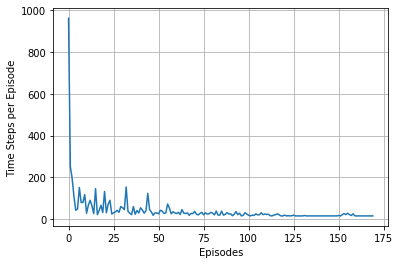

In [12]:
plt.plot(time_steps)
plt.ylabel('Time Steps per Episode')
plt.xlabel('Episodes')
plt.grid()
plt.show()